Loading the feature Engineering Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading  the Excel file
df = pd.read_excel('Feature_Engineered_Data.xlsx')

# Checking the data
df.head()


,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Target_sales,Total_expenses,Type,Month,Profit_Margin,Log_Sales,Day_of_Week,Is_Weekend,Sales_Category,Rolling_Avg_Sales_7
0,303,51,-35,2012-10-01,503,71,Major Market,Central,46,Leaves,...,90,76,Decaf,10,-0.040984,4.812184,0,False,Low,NaN
1,970,52,-24,2012-10-01,405,71,Major Market,Central,17,Leaves,...,90,45,Decaf,10,0.211382,4.820282,0,False,Low,NaN
2,409,43,-22,2012-10-02,419,64,Major Market,South,13,Leaves,...,90,36,Decaf,10,0.261682,4.682131,1,False,Low,NaN
3,850,38,-15,2012-10-03,871,56,Major Market,East,10,Leaves,...,100,21,Regular,10,0.372340,4.553877,2,False,Low,NaN
4,562,72,6,2012-10-04,650,110,Major Market,West,23,Leaves,...,80,54,Regular,10,0.307692,5.209486,3,False,Low,NaN


Select only numeric columns for PCA

In [ ]:
# Selecting only numeric columns (drop non-numeric ones like Location, Product Name, etc.)
numeric_df = df.select_dtypes(include=[float, int])

print(numeric_df.columns.tolist())


['Area Code', 'Cogs', 'DifferenceBetweenActualandTargetProfit', 'Inventory Margin', 'Margin', 'Marketing', 'Profit', 'Sales', 'Target_cogs', 'Target_margin', 'Target_profit', 'Target_sales ', 'Total_expenses', 'Month', 'Profit_Margin', 'Log_Sales', 'Day_of_Week', 'Rolling_Avg_Sales_7']


Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


Apply PCA

In [ ]:
numeric_df = numeric_df.fillna(0)
df.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Target_sales,Total_expenses,Type,Month,Profit_Margin,Log_Sales,Day_of_Week,Is_Weekend,Sales_Category,Rolling_Avg_Sales_7
0,303,51,-35,2012-10-01,503,71,Major Market,Central,46,Leaves,...,90,76,Decaf,10,-0.040984,4.812184,0,False,Low,NaN
1,970,52,-24,2012-10-01,405,71,Major Market,Central,17,Leaves,...,90,45,Decaf,10,0.211382,4.820282,0,False,Low,NaN
2,409,43,-22,2012-10-02,419,64,Major Market,South,13,Leaves,...,90,36,Decaf,10,0.261682,4.682131,1,False,Low,NaN
3,850,38,-15,2012-10-03,871,56,Major Market,East,10,Leaves,...,100,21,Regular,10,0.372340,4.553877,2,False,Low,NaN
4,562,72,6,2012-10-04,650,110,Major Market,West,23,Leaves,...,80,54,Regular,10,0.307692,5.209486,3,False,Low,NaN


In [ ]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Filling missing values (choose one method)
numeric_df = numeric_df.fillna(0)            # Option 1: Fill with 0
# numeric_df = numeric_df.fillna(numeric_df.mean())   # Option 2: Fill with column mean

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Then continue with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Creating PCA DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Combining with original dataset for better plotting
final_df = pd.concat([pca_df, df.reset_index(drop=True)], axis=1)


 Visualising the PCA result (scatter plot)
 plot PCA1 vs PCA2:

Each point = one row in your dataset (one sale record, product, location, etc.).

The position (where it is on the plot) depends on a combination of all the original features (Sales, Profit, Marketing Cost, etc.), compressed into 2 new axes:


*   PCA1 = Principal Component 1 (captures the most
variance — the most important "pattern" in your data)
*   PCA2 = Principal Component 2 (captures the second-most important pattern, different from PCA1)

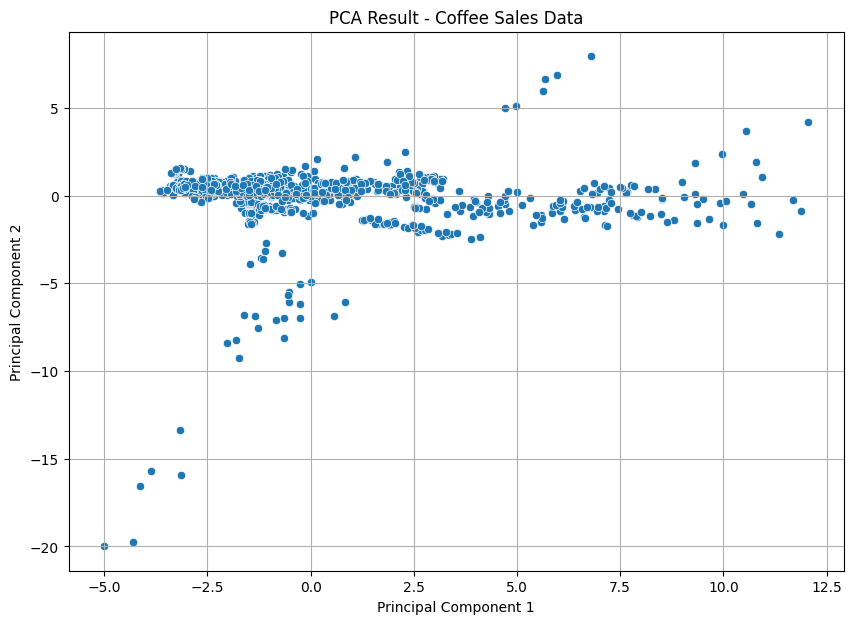

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.scatterplot(x='PCA1', y='PCA2', data=final_df)
plt.title('PCA Result - Coffee Sales Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



No Marketing Cost column found.


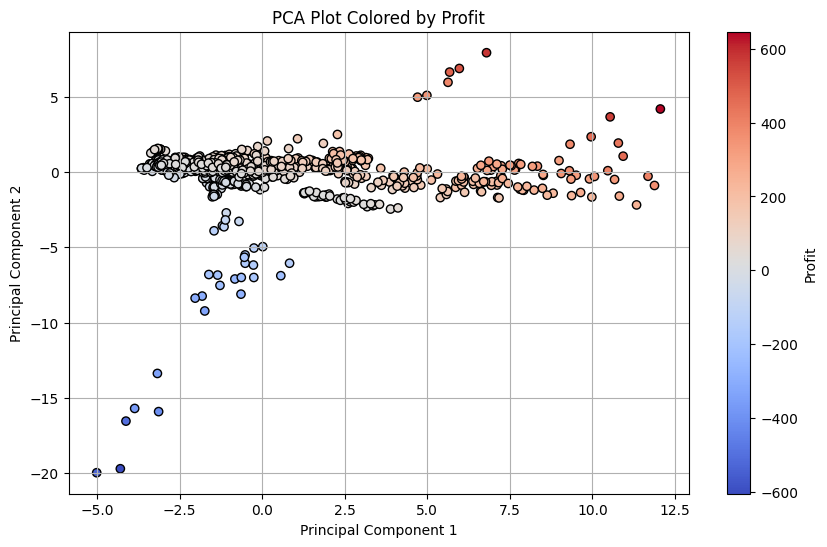

In [ ]:
if 'Marketing Cost' in df.columns or 'Marketing_Cost' in df.columns:
    cost_col = 'Marketing Cost' if 'Marketing Cost' in df.columns else 'Marketing_Cost'

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(final_df['PCA1'], final_df['PCA2'],
                          c=final_df[cost_col], cmap='Reds', edgecolor='k')
    plt.colorbar(scatter, label='Marketing Cost')
    plt.title('PCA Plot Colored by Marketing Cost')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
else:
    print("No Marketing Cost column found.")


# Coloring by Profit
# ------------------------
if 'Profit' in df.columns:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(final_df['PCA1'], final_df['PCA2'],
                          c=final_df['Profit'], cmap='coolwarm', edgecolor='k')
    plt.colorbar(scatter, label='Profit')
    plt.title('PCA Plot Colored by Profit')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
else:
    print("No Profit column found.")

Exploring Data Analysis


*   Sales over time
*   Sales by Location or Market Size

*   Profit vs. Sales (Correlation)








### Sales over Time

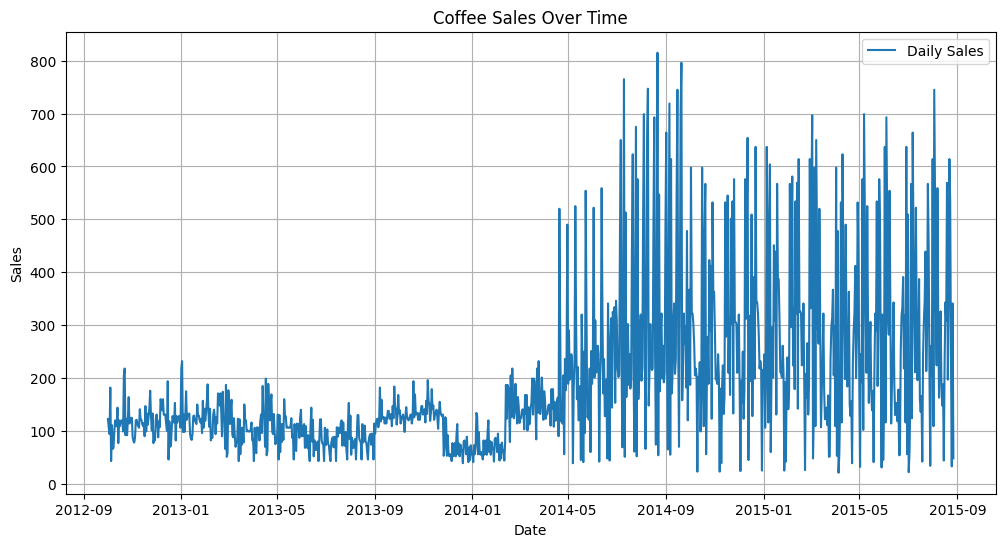

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Sales'], label='Daily Sales')
plt.title('Coffee Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()


## Sales by Location or Market Size

<ipython-input-12-84c338825e2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Sales', data=df, estimator=sum, errorbar=None, palette='mako')


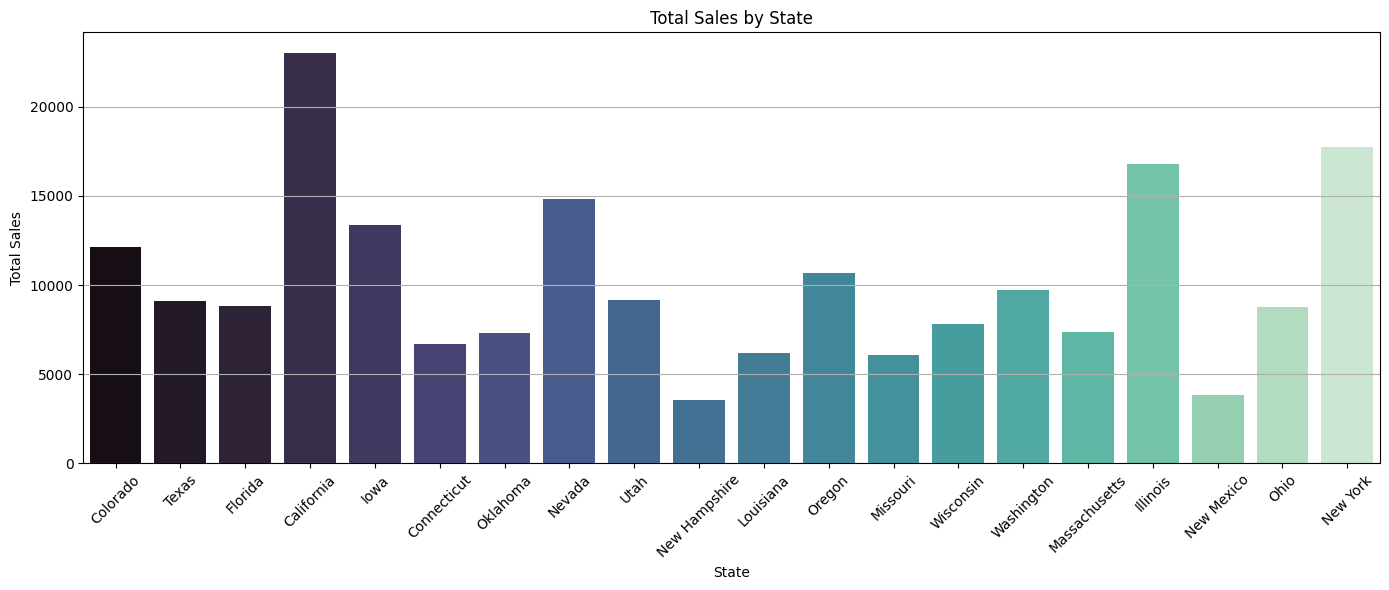

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x='State', y='Sales', data=df, estimator=sum, errorbar=None, palette='mako')
plt.xticks(rotation=45)
plt.title('Total Sales by State')
plt.ylabel('Total Sales')
plt.xlabel('State')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Getting the Total Sales by Market Size


<ipython-input-13-bd0dd9438b2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market_size', y='Sales', data=df, estimator=sum, errorbar=None, palette='viridis')


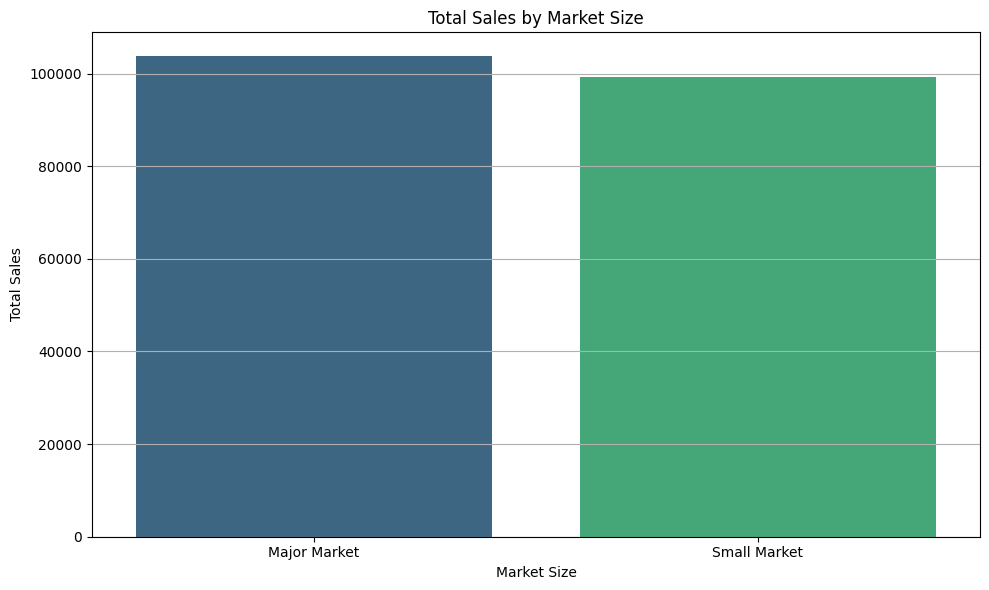

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Market_size', y='Sales', data=df, estimator=sum, errorbar=None, palette='viridis')
plt.title('Total Sales by Market Size')
plt.ylabel('Total Sales')
plt.xlabel('Market Size')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##Starting with EDA (Exploratory Data Analysis)
1. Sales over time(line plot)

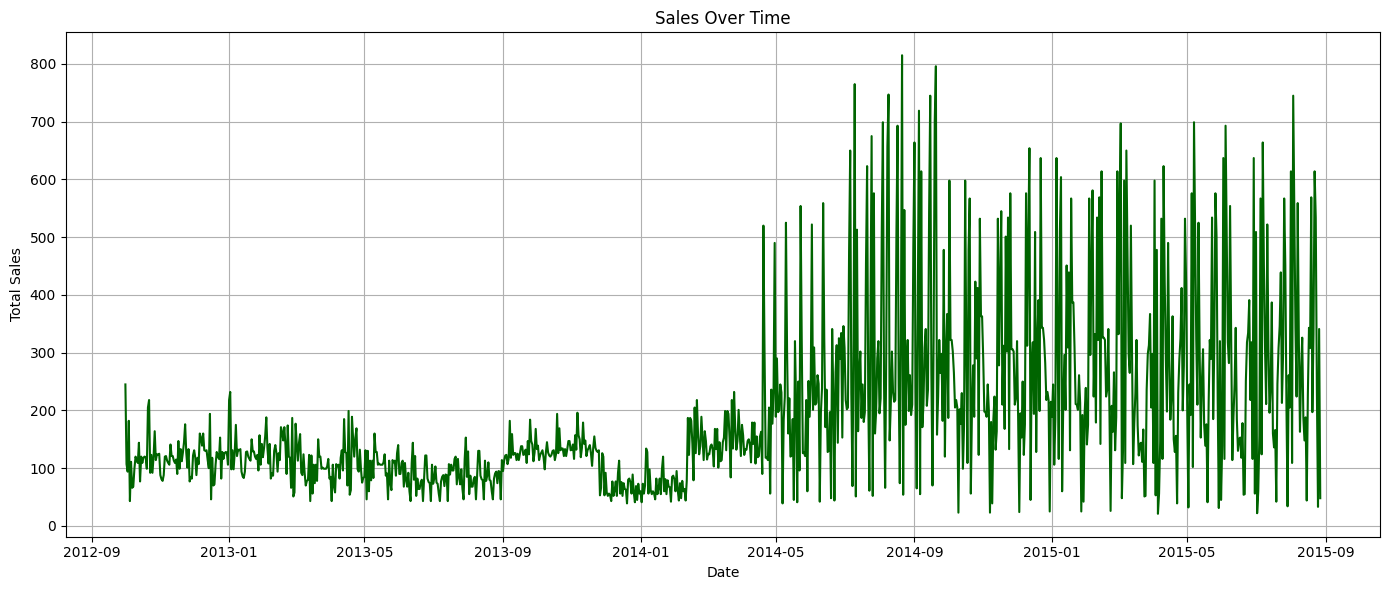

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by date
sales_over_time = df.groupby('Date')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(14,6))
plt.plot(sales_over_time['Date'], sales_over_time['Sales'], color='darkgreen')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Top Products by Sales/Profit (Bar Plot)

<ipython-input-15-0af2ca5d533e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


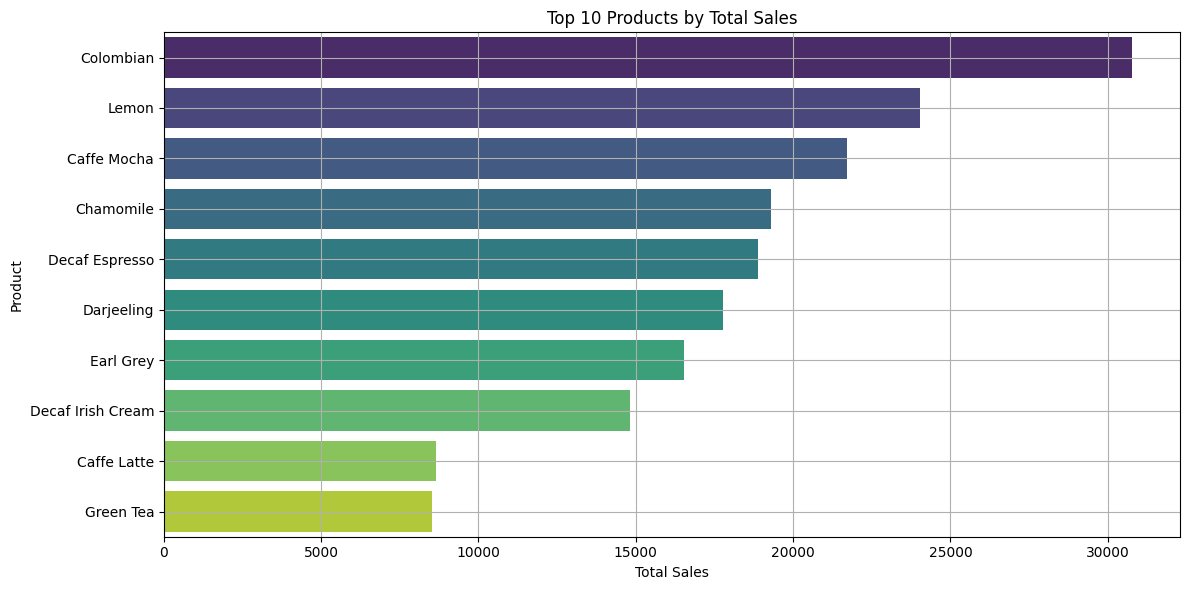

In [ ]:

# Top 10 products by total sales
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.grid(True)
plt.tight_layout()
plt.show()


3. Sales Distribution by Market Size (Box Plot)

<ipython-input-16-4b46d7296159>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Market_size', y='Sales', data=df, palette='coolwarm')


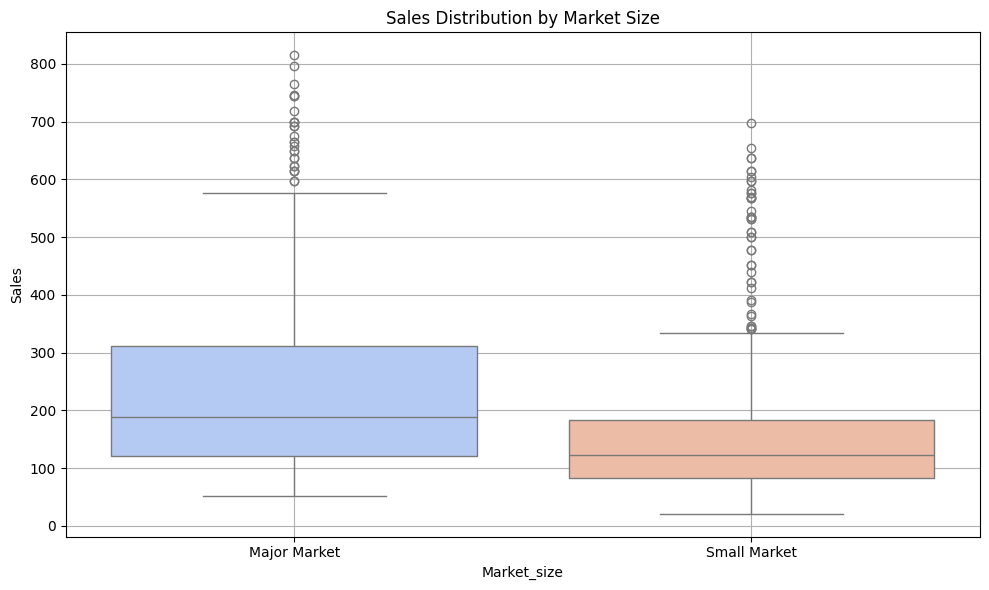

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Market_size', y='Sales', data=df, palette='coolwarm')
plt.title('Sales Distribution by Market Size')
plt.grid(True)
plt.tight_layout()
plt.show()


 4. Correlation Heatmap


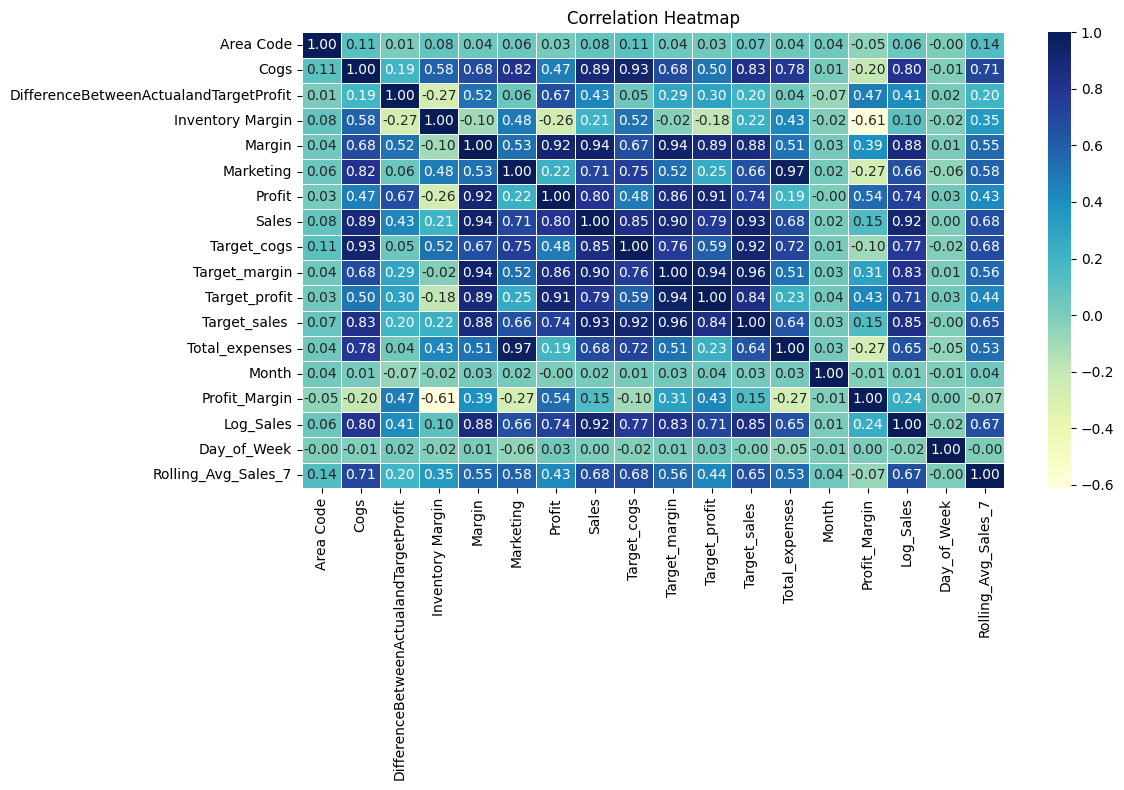

In [ ]:
# Selecting numerical columns
num_cols = df.select_dtypes(include='number')

# Computing correlation
corr = num_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


##Predictive Modelling – Sales Prediction using Linear Regression

Defining Features (X) and Target(y)

1.   Defining Features (X) and Target(y)




In [ ]:
# Cleaning column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Defining the features and target variable
features = ['Marketing', 'Cogs', 'Profit', 'Total_expenses', 'Target_sales']
X = df[features]
y = df['Sales']


2. Spliting the data
3. Training the Model
4. Making Prediction
5. Evaluate the model
We get the mean square error and R square

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')



Mean Squared Error: 129.29
R² Score: 0.99


6. Visualizing the Results

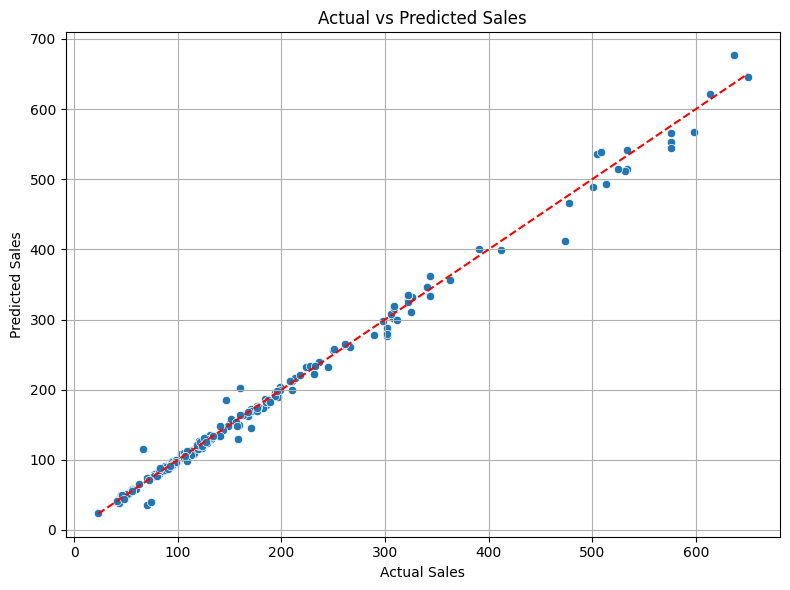

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


##Precition using
1. Pie Chart
2. Bar plot for first 10 **predictions**

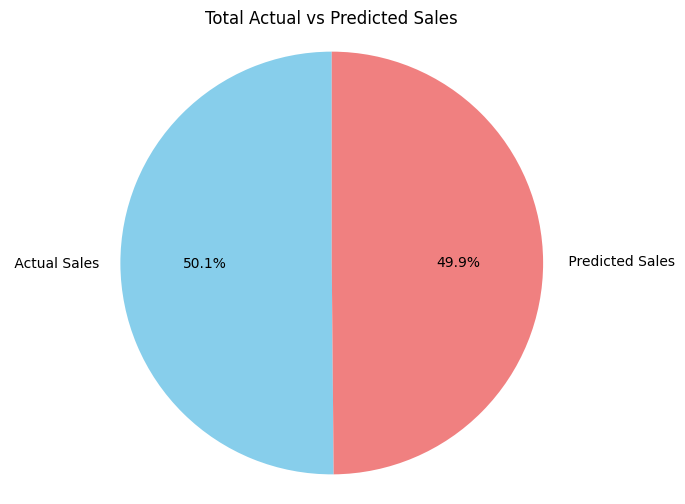

In [ ]:
total_actual = y_test.sum()
total_predicted = y_pred.sum()

labels = [' Actual Sales', ' Predicted Sales']
sizes = [total_actual, total_predicted]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Total Actual vs Predicted Sales")
plt.axis('equal')
plt.show()


2. Bar Plot(First 10 Predicitions)

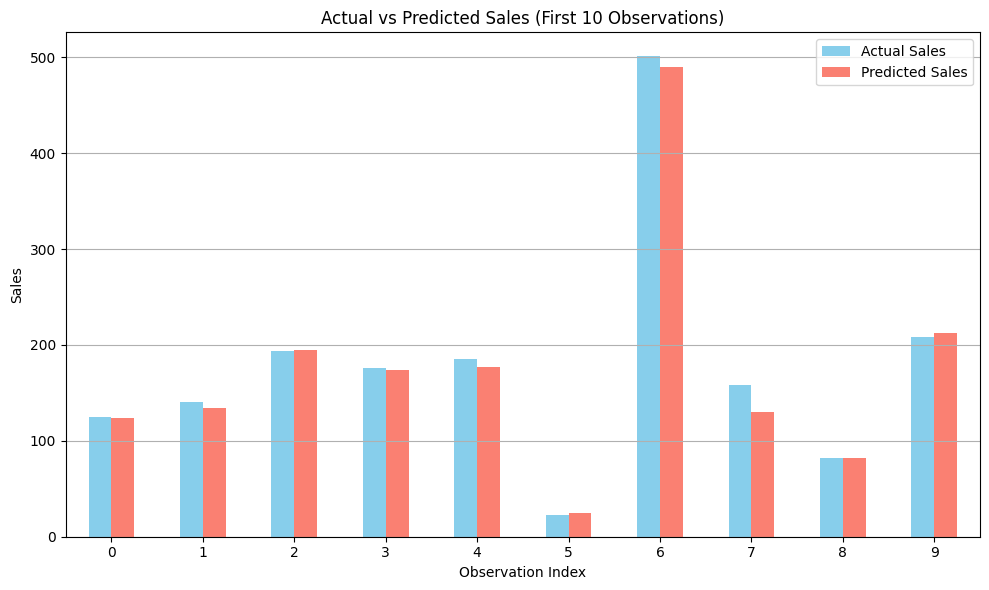

In [ ]:
import numpy as np

# Convert to DataFrame for visualization
compare_df = pd.DataFrame({
    'Actual Sales': y_test.values[:10],
    'Predicted Sales': y_pred[:10]
})

compare_df.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])
plt.title("Actual vs Predicted Sales (First 10 Observations)")
plt.xlabel("Observation Index")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


#Clustering - Grouping similar Data Points together
1. Selecting the Right Features
2. Standardizing the Data
3. Finding the Best k Using Silhouette Score
4. Applying KMeans Clustering with choosing best kvalue.


Selecting the Right Features and Standardizing the data using
Sales, Profit, Marketing, COGS, Total Expenses

In [ ]:
features_for_clustering = df[['Marketing', 'Cogs', 'Total_expenses', 'Profit', 'Sales']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)



Finding the Best k Using Silhouette Score

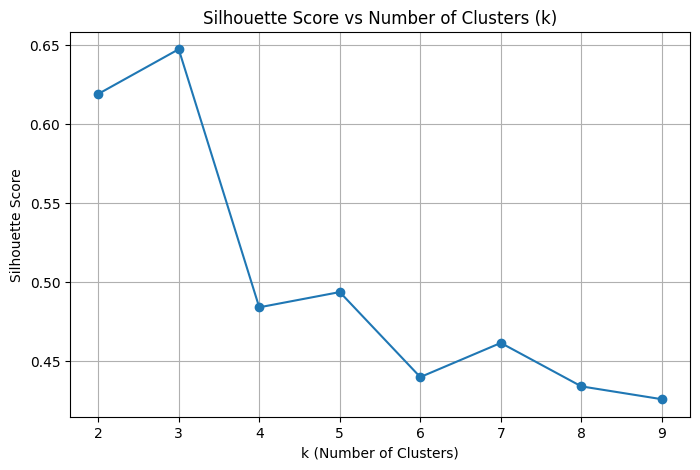

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    scores.append(score)

# Now we Plot the Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_values, scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


#Applying KMeans Clustering with Best k

*   Assuming best k = 3 based on our observation.
*   Visualize the clusters.







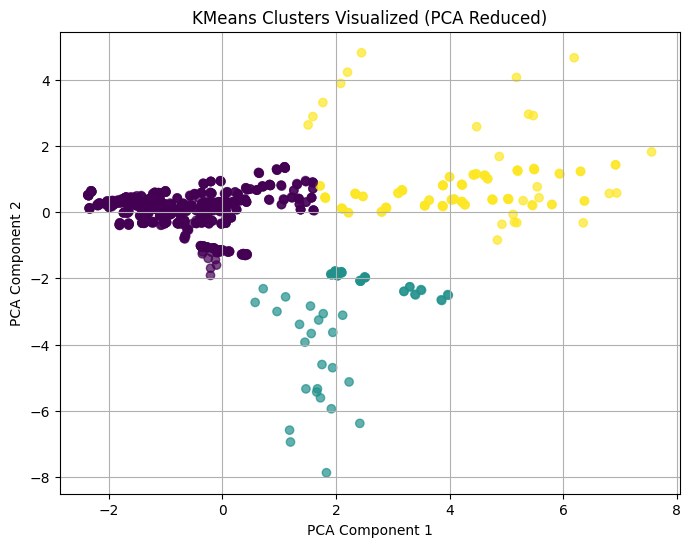

In [ ]:

best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title("KMeans Clusters Visualized (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()




*  KMeans clustering revealed three distinct groups of products based on marketing, COGS, total expenses, profit, and sales. PCA visualization showed clear separation between the clusters, suggesting meaningful behavioral segmentation. Further analysis of cluster means highlighted differences in cost-efficiency and profitability among product groups.



*   Purple- low profit and more customers
*   Teal- No profit
*  Yellow- Premium Customers





